In [66]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Visualize mask example

Number of masks: 105
Shape of each mask array: (480, 640)
Total frames loaded: 105


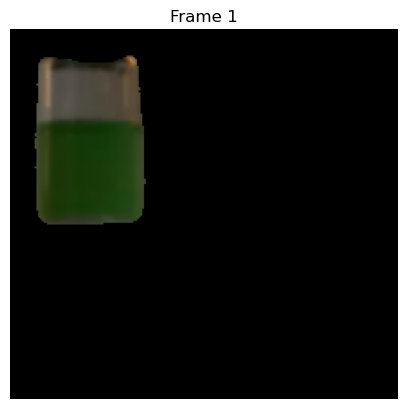

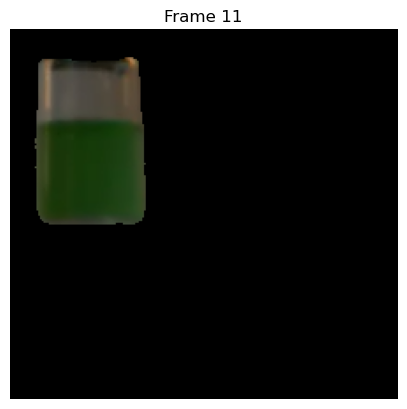

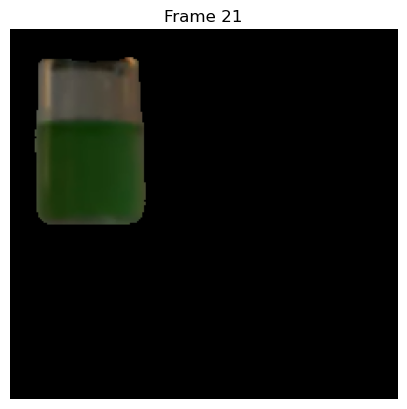

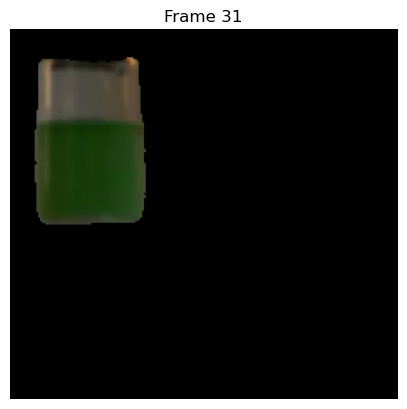

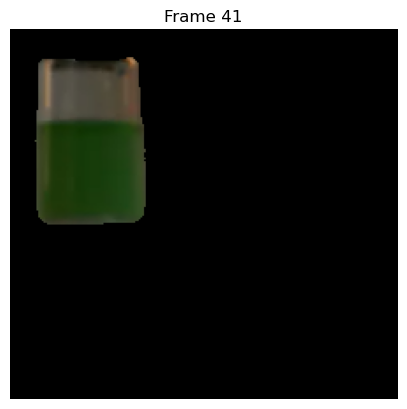

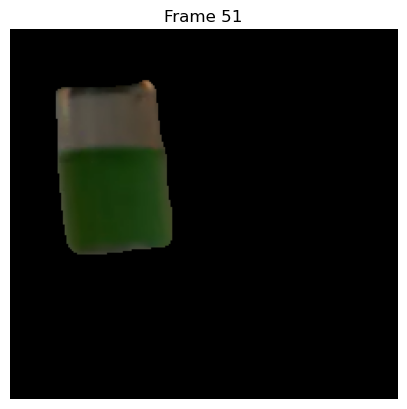

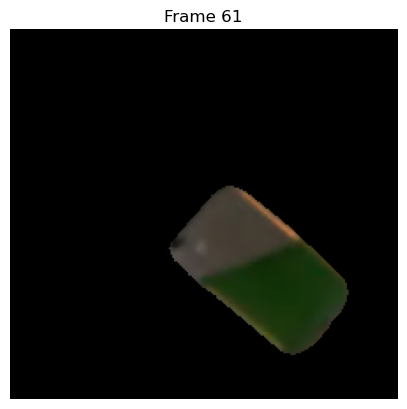

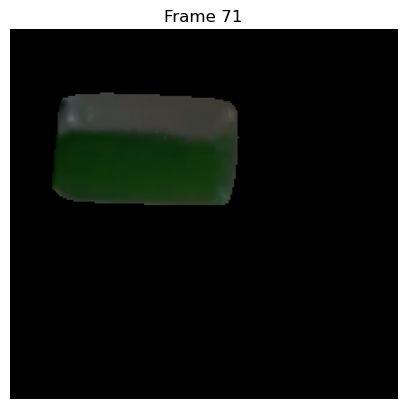

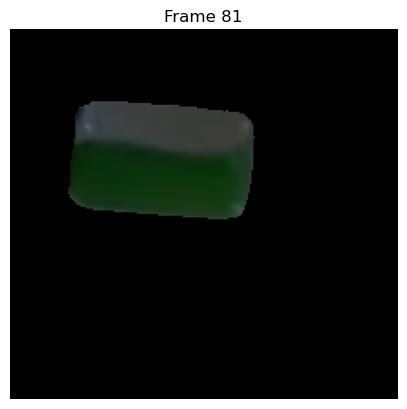

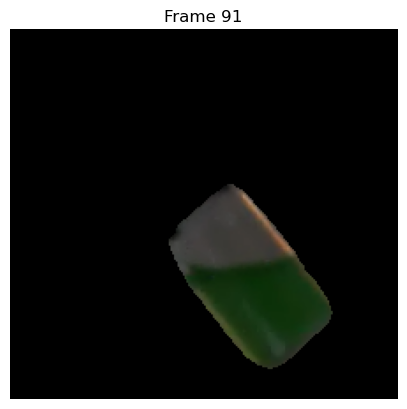

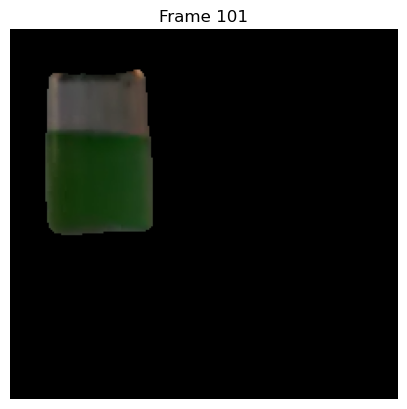

In [82]:
masks = np.load('masks.npy')
print(f"Number of masks: {len(masks)}")
# Each element in the masks array is a 2D numpy array with shape (480, 640)
print(f"Shape of each mask array: {masks[0].shape}")

# Load the video P0_1.avi located in the data/raw folder
video_path = os.path.join('data', 'raw', 'P0_TILT_GREEN_7.avi')
cap = cv2.VideoCapture(video_path)

# Initialize an empty list to store the frames
frames = []

# Read and store each frame
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

# Release the video capture object
cap.release()

# Check the number of frames loaded
print(f"Total frames loaded: {len(frames)}")

for index, (mask, frame) in enumerate(zip(masks, frames)):
    
    # # Apply the mask to the frame
    masked_frame = cv2.bitwise_and(frame, frame, mask=mask.astype(np.uint8))
    
    masked_frame = masked_frame[260:470, 300:520]
    
    # # Display the masked image
    if index % 10 == 0:
        plt.imshow(masked_frame)
        plt.title(f"Frame {index+1}")
        plt.axis('off')
        plt.show()